# Problem 3

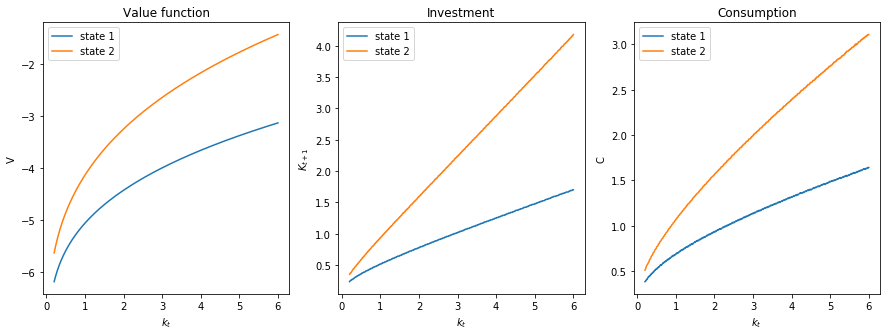

In [1]:
import numpy as np

beta=.9

nbk=500
nba=2
crit=1
epsi=1e-6
p=.5
PI=np.array([[p,1-p],[1-p,p]])
itera=0
### State space

Kmin=.2
Kmax=6
Kgrid=np.linspace(Kmin,Kmax,nbk)

C=np.zeros([nbk,nba])
util=np.zeros([nbk,nba])
#v=np.random.rand(nbk,nba)
v=np.zeros([nbk,nba])
Tv=np.zeros([nbk,nba])
dr=np.zeros([nbk,nba],dtype=int)



### Value function iteration
while crit>epsi:
    for i in range(nbk):
        for j in range(nba):
            co=(1-j)*(np.array([0.9,0.3]))+j*np.array([1.1,0.9])
            c=co@np.array([np.power(Kgrid[i],0.3), Kgrid[i]])-Kgrid
            neg=c<=0
            c[neg]=float('nan')
            util[:,j]=np.log(c)
            util[neg,j]=-1e12
        d=util+beta*v@PI
        dr[i,:]=np.argmax(d,axis=0)
        Tv[i,:]=np.max(d,axis=0)
    crit=np.max(np.abs(Tv-v))
    v=Tv*1
    itera=itera+1
    
### optimal policies
K_sol=Kgrid[dr]
for j in range(nba):
    co=(1-j)*(np.array([0.9,0.3]))+j*np.array([1.1,0.9])
    C[:,j]=co@np.array([np.power(Kgrid,0.3), Kgrid])-K_sol[:,j]
    
    
from matplotlib import pyplot as plt
#plt.rc('text', usetex=True)

plt.figure(1,figsize=(15, 5))
plt.subplot(131)

plt.plot(Kgrid,v[:,0]) 
plt.plot(Kgrid,v[:,1]) 
plt.xlabel(r'$k_t$')
plt.ylabel('V')
plt.title('Value function')
plt.legend(('state 1','state 2'))


plt.subplot(132)
plt.plot(Kgrid,K_sol[:,0]) 
plt.plot(Kgrid,K_sol[:,1]) 
plt.xlabel(r'$k_t$')
plt.ylabel(r'$K_{t+1}$')
plt.title('Investment')
plt.legend(('state 1','state 2'))

plt.subplot(133)
plt.plot(Kgrid,C[:,0]) 
plt.plot(Kgrid,C[:,1]) 
plt.xlabel(r'$k_t$')
plt.ylabel('C')
plt.title('Consumption')
plt.legend(('state 1','state 2'))

plt.show()    
        